<a href="https://colab.research.google.com/github/sweety001/Leveraging-Artificial-Intelligence-models-for-analyzing-the-effect-of-Covid-vaccination/blob/main/Covid_(new_cases).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# India Covid Second Wave New Cases 2
Dependent variable: new_cases_perthousand

Independent variables: people_vaccinated_per_hundred, people_fully_vaccinated_per_hundred, stringency_index, new_tests_perthousand

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
DataCovid = pd.read_csv("/content/drive/MyDrive/DataSet/copy-owid-covid-data.csv")
DataCovid.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,Unnamed: 59,new_cases_permillion,new_deaths_permillion,new_tests_permillion,new_tests_perthousand,new_cases_perthousand,new_deaths_perthousand
0,AFG,AFG,Afghanistan,24-02-2020,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0.000001,0.0,0.0,0.0,0.001,0.0
1,AFG,Asia,Afghanistan,25-02-2020,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0.000000,0.0,0.0,0.0,0.000,0.0
2,AFG,Asia,Afghanistan,26-02-2020,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0.000000,0.0,0.0,0.0,0.000,0.0
3,AFG,Asia,Afghanistan,27-02-2020,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0.000000,0.0,0.0,0.0,0.000,0.0
4,AFG,Asia,Afghanistan,28-02-2020,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0.000000,0.0,0.0,0.0,0.000,0.0


In [30]:
DataCovid.insert(loc=0, column='A', value=np.arange(len(DataCovid)))

In [31]:
InpData = DataCovid[['A', 'date', 'location', 'new_cases_perthousand', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'stringency_index','new_tests_perthousand']]
InpData.head()

,A,date,location,new_cases_perthousand,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,stringency_index,new_tests_perthousand
0,0,24-02-2020,Afghanistan,0.001,NaN,NaN,8.33,0.0
1,1,25-02-2020,Afghanistan,0.000,NaN,NaN,8.33,0.0
2,2,26-02-2020,Afghanistan,0.000,NaN,NaN,8.33,0.0
3,3,27-02-2020,Afghanistan,0.000,NaN,NaN,8.33,0.0
4,4,28-02-2020,Afghanistan,0.000,NaN,NaN,8.33,0.0


In [32]:
InpIndia = InpData[InpData['location'] == 'India']

In [33]:
InpIndia.tail()

,A,date,location,new_cases_perthousand,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,stringency_index,new_tests_perthousand
39155,39155,31-05-2021,India,127.510,12.12,3.13,81.94,1683.135
39156,39156,01-06-2021,India,132.788,12.29,3.16,NaN,1925.374
39157,39157,02-06-2021,India,134.154,12.45,3.17,NaN,3265.073
39158,39158,03-06-2021,India,132.364,12.63,3.19,NaN,3725.318
39159,39159,04-06-2021,India,120.529,12.98,3.22,NaN,3651.198


In [34]:
InpIndiaSW = InpIndia[InpIndia['A'] >= 39053] #second wave started
InpIndiaSW.tail()
InpIndiaSW.isna().any()

A                                      False
date                                   False
location                               False
new_cases_perthousand                  False
people_vaccinated_per_hundred           True
people_fully_vaccinated_per_hundred     True
stringency_index                        True
new_tests_perthousand                  False
dtype: bool

In [35]:
InpIndiaSW.dropna(inplace=True)
InpIndiaSW.shape
InpIndiaSW.isna().any()
InpIndiaSW.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,A,new_cases_perthousand,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,stringency_index,new_tests_perthousand
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,39103.212121,161.372818,5.857071,1.294141,68.831313,1243.508636
std,30.109417,137.393275,3.836507,1.058821,8.921705,562.989261
min,39053.000000,10.584000,0.680000,0.030000,57.870000,0.000000
25%,39077.500000,25.805500,1.865000,0.415000,59.720000,790.000500
50%,39102.000000,127.510000,5.980000,0.860000,69.910000,1180.136000
75%,39129.500000,274.956000,9.450000,2.240000,73.610000,1721.750000
max,39155.000000,414.188000,12.120000,3.130000,81.940000,2217.320000


**Plotting the Data**

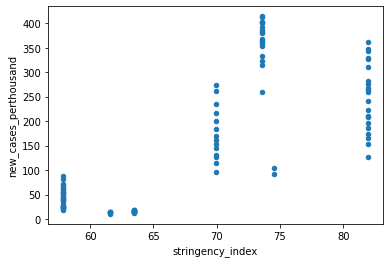

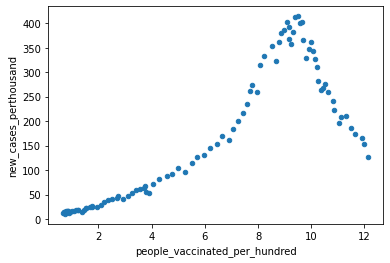

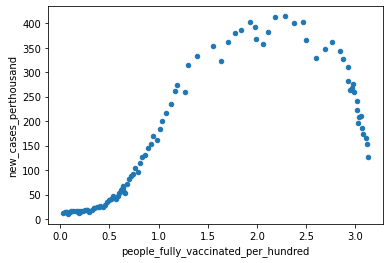

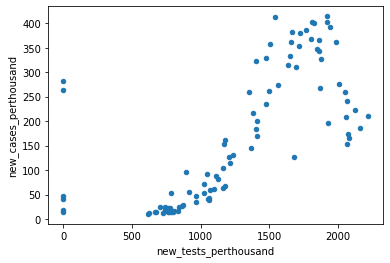

In [36]:
InpIndiaSW.plot(kind= 'scatter', x = 'stringency_index', y='new_cases_perthousand')
InpIndiaSW.plot(kind= 'scatter', x = 'people_vaccinated_per_hundred', y='new_cases_perthousand')
InpIndiaSW.plot(kind= 'scatter', x = 'people_fully_vaccinated_per_hundred', y='new_cases_perthousand')
InpIndiaSW.plot(kind= 'scatter', x = 'new_tests_perthousand', y='new_cases_perthousand')

In [37]:
X = InpIndiaSW.iloc[:,4:8].values
y= InpIndiaSW.iloc[:,3].values
#y
#InpIndia.new_deaths_perthousand.max()

In [38]:
#splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3, random_state =0)

In [39]:
# # scalling the Data
# from sklearn.preprocessing import StandardScaler

# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

**Random Forest Regressor** 

In [40]:
from sklearn.ensemble import RandomForestRegressor
RFReg = RandomForestRegressor(n_estimators =50, random_state = 0)
RFReg.fit(X_train, y_train) 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [41]:
y_predict_rfr = RFReg.predict((X_test))
#y_predict_rfr
#y_test


In [42]:
#R squared value
from sklearn import metrics
r_square = metrics.r2_score(y_test, y_predict_rfr)
r_square

0.9601282424221588

In [43]:
#the errors
MAE_RFReg = metrics.mean_absolute_error(y_test,y_predict_rfr)
MSE_RFReg = metrics.mean_squared_error(y_test,y_predict_rfr)
RMSE_RFReg = np.sqrt(metrics.mean_squared_error(y_test,y_predict_rfr))
print(MAE_RFReg)
print(MSE_RFReg)
print(RMSE_RFReg)

15.701088000000016
742.4391526098141
27.247736651138826


In [44]:
cases_predict = RFReg.predict([[7.300000e-01, 7.000000e-02, 6.157000e+01, 6.700500e+02],[0.06, 0.3, 50,80]])
cases_predict

array([13.2529 , 16.31894])

**Multiple Linear Regression**

In [45]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size =0.3, random_state =0)

In [46]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
intercept = lm.intercept_
coef = lm.coef_
print(intercept)
print(coef)

-127.52443025093746
[ 4.57383993e+01 -7.24035698e+01  1.42845741e+00  1.47099446e-02]


In [48]:
y_predict_LReg = lm.predict(X_test)

In [49]:
MAE_LReg = metrics.mean_absolute_error(y_test,y_predict_LReg)
MSE_LReg = metrics.mean_squared_error(y_test,y_predict_LReg)
RMSE_LReg = np.sqrt(metrics.mean_squared_error(y_test,y_predict_LReg))
print(MAE_LReg)
print(MSE_LReg)
print(RMSE_LReg)

57.355231015597354
6048.364454725382
77.77123153663815


In [50]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='new_cases_perthousand ~ people_vaccinated_per_hundred+people_fully_vaccinated_per_hundred+stringency_index+new_tests_perthousand', data = InpIndiaSW).fit()
print(lm.conf_int())
lm.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                                              0           1
Intercept                           -297.611999  163.818862
people_vaccinated_per_hundred         29.989679   58.023886
people_fully_vaccinated_per_hundred -110.213264  -15.518070
stringency_index                      -3.514574    4.388741
new_tests_perthousand                 -0.025038    0.060085


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     new_cases_perthousand   R-squared:                       0.747
Model:                               OLS   Adj. R-squared:                  0.736
Method:                    Least Squares   F-statistic:                     69.42
Date:                   Sun, 29 Aug 2021   Prob (F-statistic):           3.14e-27
Time:                           03:57:52   Log-Likelihood:                -559.29
No. Observations:                     99   AIC:                             1129.
Df Residuals:                         94   BIC:                             1142.
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                             -66.8966    116.199     -0.576      0.566    -297.612     163.819
people_vaccinated_per_hundred          44.0068      7.060      6.234      0.000      29.990      58.024
people_fully_vaccinated_per_hundred   -62.8657     23.846     -2.636      0.010    -110.213     -15.518
stringency_index                        0.4371      1.990      0.220      0.827      -3.515       4.389
new_tests_perthousand                   0.0175      0.021      0.817      0.416      -0.025       0.060
==============================================================================
Omnibus:                        2.945   Durbin-Watson:                   0.044
Prob(Omnibus):                  0.229   Jarque-Bera (JB):                2.417
Skew:                          -0.232   Prob(JB):                        0.299
Kurtosis:                       3.609   Cond. No.                     2.25e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""